# Water Quality Dataset

### Water quality dataset is used to determine the Drinking water potability.

Column description:
1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold

#Importing necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score,silhouette_samples
from time import time

import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
#from sklearn.metrics import score

from pandas import read_csv
import pandas as pd
import numpy as np
import os
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, CategoricalNB
from sklearn import  svm

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score,silhouette_samples
from time import time

In [5]:
# Loading the dataset
water = pd.read_csv('water_potability.csv')

In [6]:
# Size of the dataset
print("Size of the dataset: ", water.shape)

# Printing the first few rows and column names
print(water.head(), water.columns, len(water.columns))

Size of the dataset:  (3276, 10)
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0   Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turb

In [7]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [9]:
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
water['Sulfate'] = water['Sulfate'].replace(np.nan,0)
water['ph'] = water['ph'].replace(np.nan,0)
water['Trihalomethanes'] = water['Trihalomethanes'].replace(np.nan,0)

In [11]:
water["ph"]=water["ph"].fillna(water['ph'].median)
water["Sulfate"]=water["Sulfate"].fillna(water['Sulfate'].median)
water["Trihalomethanes"]=water["Trihalomethanes"].fillna(water['Trihalomethanes'].median)

In [12]:
water.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

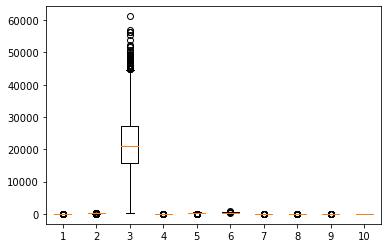

<Figure size 720x504 with 0 Axes>

In [13]:
plt.boxplot(water)
fig = plt.figure(figsize =(10, 7))
plt.show()

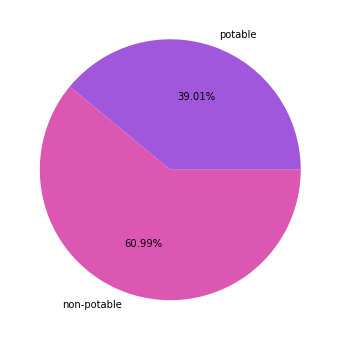

In [14]:
plt.figure(figsize=(6, 6))
label = ['potable','non-potable']
count = [len(water[water['Potability'] == 1]),len(water[water['Potability'] == 0])]
colors = sns.color_palette("hls", 8)[6:8]
plt.pie(count, labels = label,colors=colors,autopct='%1.2f%%')
plt.show()

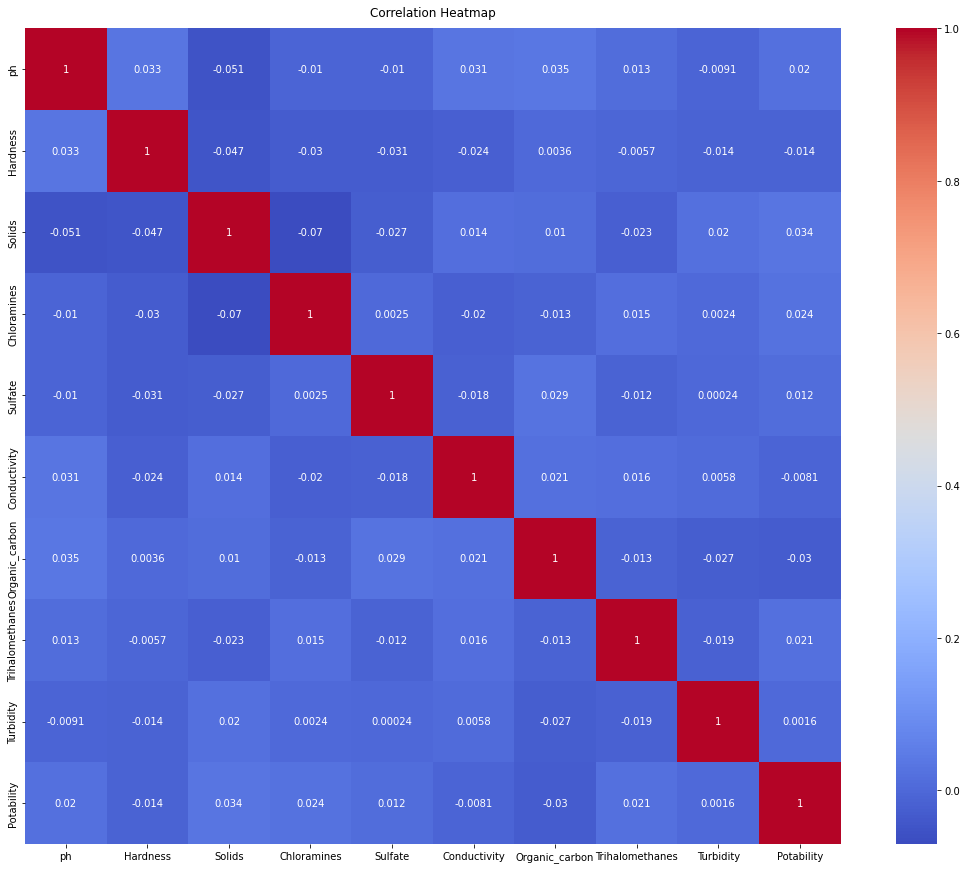

In [12]:
# Increase the size of the heatmap.
plt.figure(figsize=(20, 15))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
heatmap = sns.heatmap(water.corr(), annot=True, square=True, cmap='coolwarm')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()
plt.close()

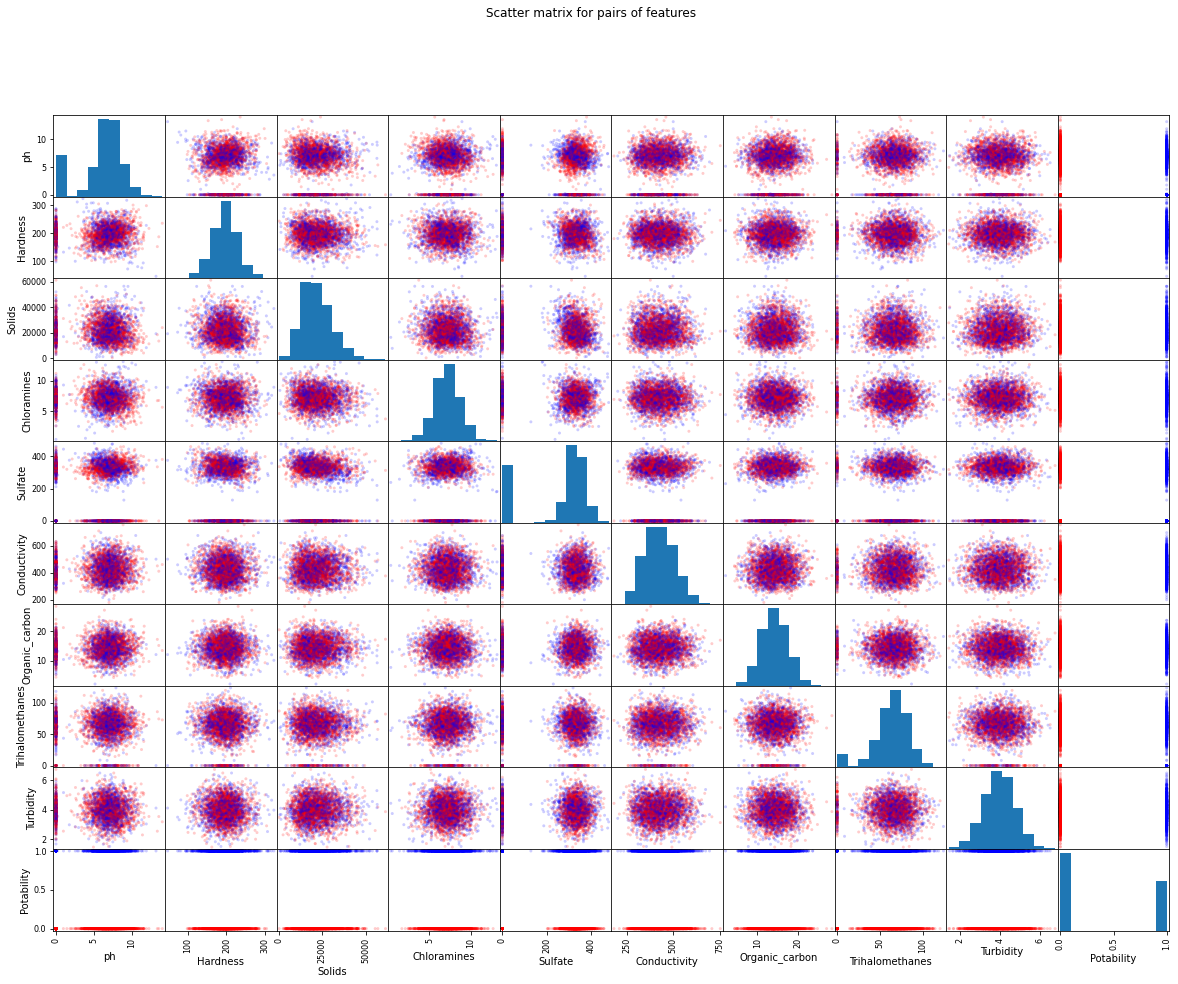

In [13]:
color_dic = {0:'red', 1:'blue'} 
target_list = list(water['Potability'])
colors = list(map(lambda x: color_dic.get(x), target_list))
#Plotting the scatter matrix
sm = pd.plotting.scatter_matrix(water, c= colors, alpha=0.2, figsize=((20,15)))
plt.suptitle("Scatter matrix for pairs of features ")
plt.show()

In [15]:
def drop_outliers(water,feature):
    iqr=1.5 * (np.percentile(water[feature],80)-np.percentile(water[feature],10))
    water.drop(water[water[feature]> (iqr+np.percentile(water[feature],80))].index,inplace=True)
    water.drop(water[water[feature]< (np.percentile(water[feature],10)-iqr)].index,inplace=True)

In [16]:
drop_outliers(water,'ph')
drop_outliers(water,'Hardness')
drop_outliers(water,'Solids')
drop_outliers(water,'Chloramines')
drop_outliers(water,'Sulfate')
drop_outliers(water,'Conductivity')
drop_outliers(water,'Organic_carbon')
drop_outliers(water,'Trihalomethanes')
drop_outliers(water,'Turbidity')

In [17]:
water.shape

(3265, 10)

In [21]:
x = water.drop('Potability',axis=1)
y = water['Potability']
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

## Naive Bayes

In [14]:
model = GaussianNB()
model.fit(x_train,y_train)
pred=model.predict(x_test)
#plot_mushroom_boundary(X_test, y_test, model)

In [15]:
print("Model score:",model.score(x_test,y_test))
print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Accuracy score:",accuracy_score(pred,y_test))

Model score: 0.6294027565084227
Mean absolute error: 0.37059724349157736
Accuracy score: 0.6294027565084227


In [16]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.66      0.89      0.76       426
           1       0.41      0.14      0.21       227

    accuracy                           0.63       653
   macro avg       0.53      0.52      0.48       653
weighted avg       0.57      0.63      0.57       653



In [17]:
print("Confusion Matrix\n:", confusion_matrix(y_test,pred))
pred_prob = model.predict_proba(x_test)
print("ROC_AUC score:\n", roc_auc_score(y_test, pred_prob[:,1]))

Confusion Matrix
: [[379  47]
 [195  32]]
ROC_AUC score:
 0.5506607929515419


C:\Users\Hemalatha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


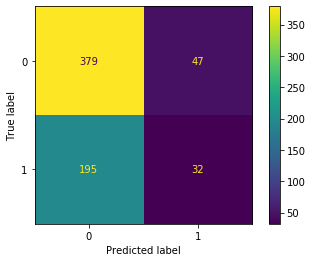

In [20]:
plot_confusion_matrix(model, x_test, y_test)  
plt.show()

C:\Users\Hemalatha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


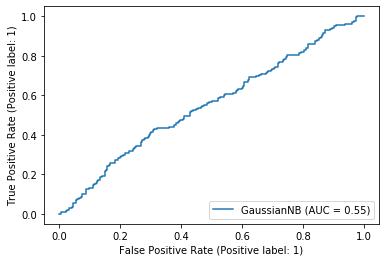

In [18]:
plot_roc_curve(model, x_test, y_test)

In [31]:
kfold = StratifiedKFold(n_splits=10)
nbcv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
print("Cross Val Score: 10 fold\n")
print('%f (%f)' % (nbcv_results.mean(), nbcv_results.std()))

Cross Val Score: 10 fold

0.596076 (0.020833)


In [30]:
from sklearn.model_selection import cross_val_predict
nbcv_pred = cross_val_predict(model, x_test, y_test, cv=kfold)
print("Confusion Matrix:\n", confusion_matrix(y_test,nbcv_pred))
print("Mean absolute error:",mean_absolute_error(nbcv_pred,y_test))
print("Accuracy score:",accuracy_score(nbcv_pred,y_test))

Confusion Matrix:
 [[405  21]
 [209  18]]
Mean absolute error: 0.35222052067381315
Accuracy score: 0.6477794793261868


In [33]:
print(classification_report(y_test,nbcv_pred))
pred_prob = model.predict_proba(x_test)
print("ROC_AUC score:\n", roc_auc_score(y_test, pred_prob[:,1]))

              precision    recall  f1-score   support

           0       0.66      0.95      0.78       426
           1       0.46      0.08      0.14       227

    accuracy                           0.65       653
   macro avg       0.56      0.51      0.46       653
weighted avg       0.59      0.65      0.56       653

ROC_AUC score:
 0.5506607929515419


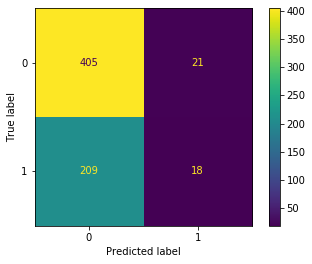

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,nbcv_pred))
disp.plot()
plt.show()

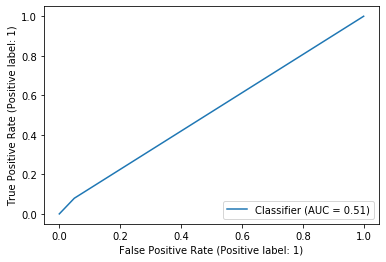

In [43]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, nbcv_pred)

## SVM

In [23]:
classifier = SVC()
classifier.fit(x_train, y_train)
predicted = classifier.predict(x_test)

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       426
           1       0.56      0.18      0.27       227

    accuracy                           0.66       653
   macro avg       0.62      0.55      0.53       653
weighted avg       0.64      0.66      0.60       653


Confusion matrix:
[[394  32]
 [187  40]]


c:\users\preethi\documents\uni of surrey\semester 1\machine learning and data mining\course work\cw_codes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


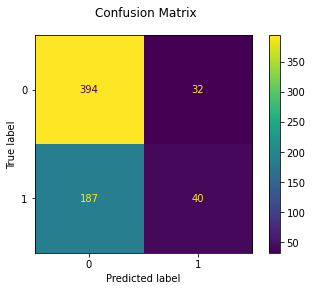

In [24]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

In [25]:
name="SVM"
kfold = StratifiedKFold(n_splits=10)
cv_results = cross_val_score(classifier, x_train, y_train, cv=kfold, scoring='accuracy')
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

SVM: 0.625956 (0.009274)


In [26]:
svc_params = {"C": np.arange(1,10),
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf' ,"linear"]
             }

svc = SVC()

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [27]:
print("best score:" + str(svc_cv_model.best_score_))
print("The best parameters: " + str(svc_cv_model.best_params_))

best score:0.6358939486999503
The best parameters: {'C': 4, 'gamma': 0.1, 'kernel': 'rbf'}


In [28]:
svc_tuned = SVC(kernel = "rbf", C = 4 , gamma = 0.1).fit(x_train, y_train)

In [29]:
y_pred = svc_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.667687595712098

Classification report for classifier SVC(C=4, gamma=0.1):
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       426
           1       0.54      0.32      0.40       227

    accuracy                           0.67       653
   macro avg       0.62      0.59      0.59       653
weighted avg       0.64      0.67      0.64       653


Confusion matrix:
[[363  63]
 [154  73]]


c:\users\preethi\documents\uni of surrey\semester 1\machine learning and data mining\course work\cw_codes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


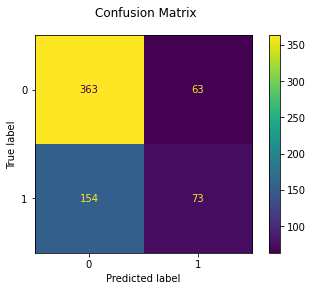

In [30]:
print("Classification report for classifier %s:\n%s\n"
      % (svc_tuned, metrics.classification_report(y_test, y_pred)))
disp = metrics.plot_confusion_matrix(svc_tuned, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)
plt.show()

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [32]:
classifier = SVC()
classifier.fit(x_train, y_train)
predicted = classifier.predict(x_test)

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.67      0.94      0.78       523
           1       0.61      0.16      0.25       294

    accuracy                           0.66       817
   macro avg       0.64      0.55      0.52       817
weighted avg       0.65      0.66      0.59       817


Confusion matrix:
[[494  29]
 [248  46]]


c:\users\preethi\documents\uni of surrey\semester 1\machine learning and data mining\course work\cw_codes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


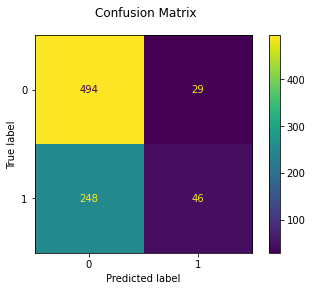

In [33]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

In [34]:
name="SVM"
kfold = StratifiedKFold(n_splits=10)
cv_results = cross_val_score(classifier, x_train, y_train, cv=kfold, scoring='accuracy')
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

SVM: 0.619687 (0.011396)


In [35]:
svc_params = {"C": np.arange(1,10),
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf' ,"linear"]
             }

svc = SVC()

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [36]:
print("best score:" + str(svc_cv_model.best_score_))
print("The best parameters: " + str(svc_cv_model.best_params_))

best score:0.6258046169287387
The best parameters: {'C': 4, 'gamma': 0.1, 'kernel': 'rbf'}


In [37]:
svc_tuned = SVC(kernel = "rbf", C = 4 , gamma = 0.1).fit(x_train, y_train)

In [38]:
y_pred = svc_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.6682986536107711

Classification report for classifier SVC(C=4, gamma=0.1):
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       523
           1       0.57      0.31      0.40       294

    accuracy                           0.67       817
   macro avg       0.63      0.59      0.59       817
weighted avg       0.65      0.67      0.64       817


Confusion matrix:
[[454  69]
 [202  92]]


c:\users\preethi\documents\uni of surrey\semester 1\machine learning and data mining\course work\cw_codes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


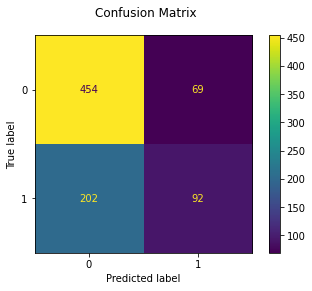

In [39]:
print("Classification report for classifier %s:\n%s\n"
      % (svc_tuned, metrics.classification_report(y_test, y_pred)))
disp = metrics.plot_confusion_matrix(svc_tuned, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)
plt.show()

In [40]:
 print('roc_auc_score: ', roc_auc_score(y_test, y_pred))

roc_auc_score:  0.5904970018600174


In [41]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

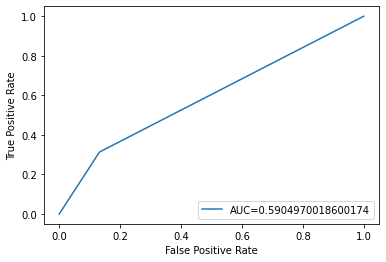

In [42]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Decision Tree, Gradient Boosting and Random Forest Classifiers

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)

NUM_POINTS = 9
features= list(water.columns[0:NUM_POINTS])

In [20]:
# Decision Tree Classifier

DTree = DecisionTreeClassifier(criterion = 'entropy',random_state=0) # Building a  model
clf1_DT = DTree.fit(x_train, y_train) # Training a  model
y_pred_DT =  DTree.predict(x_test) # Make predictions

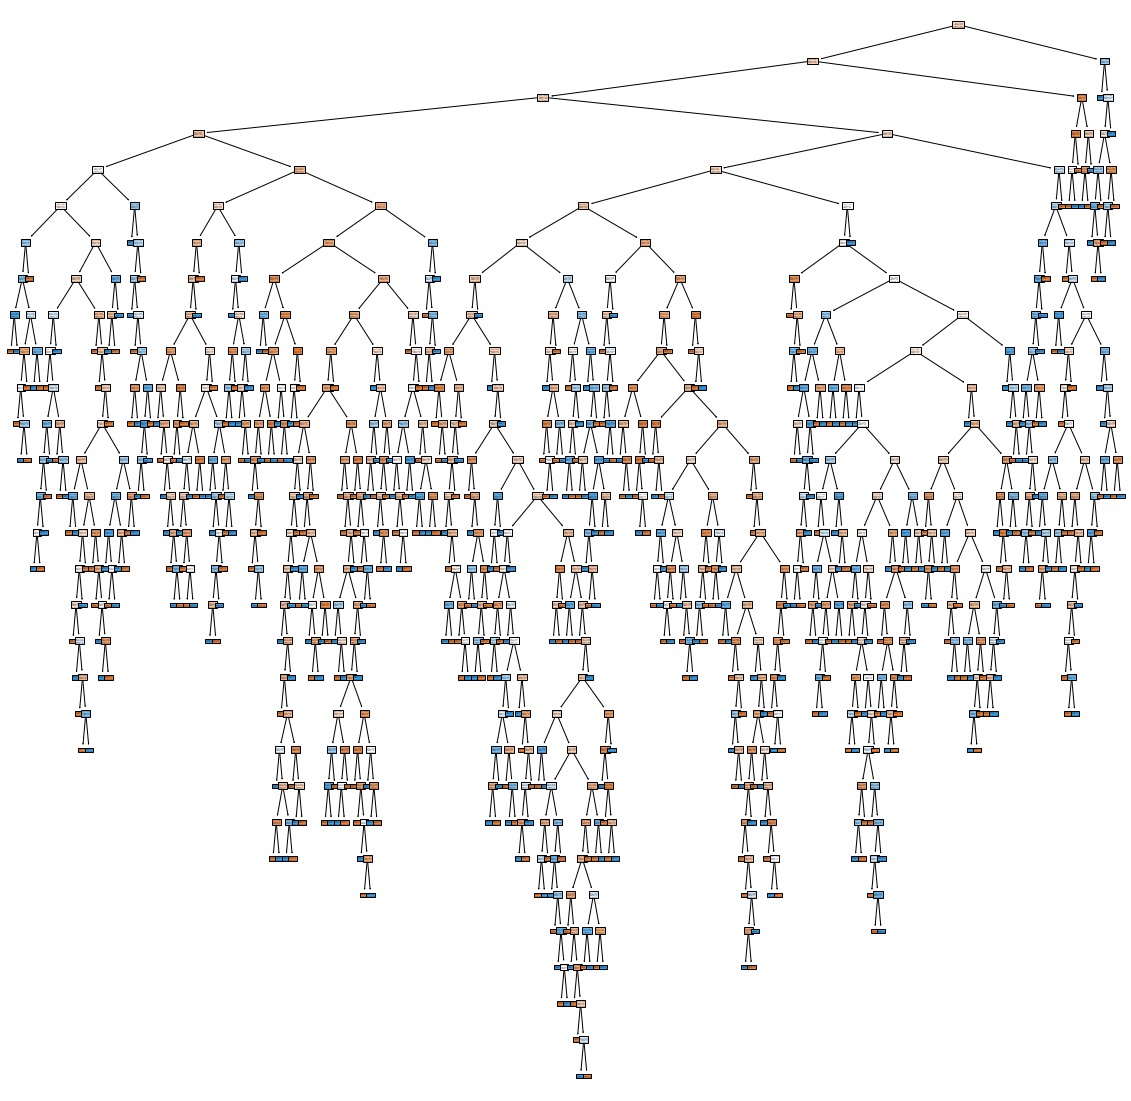

In [21]:
#  Visualize Decision Tree
plt.figure(figsize=(20,20))
plot_tree(clf1_DT, filled=True)
plt.show()

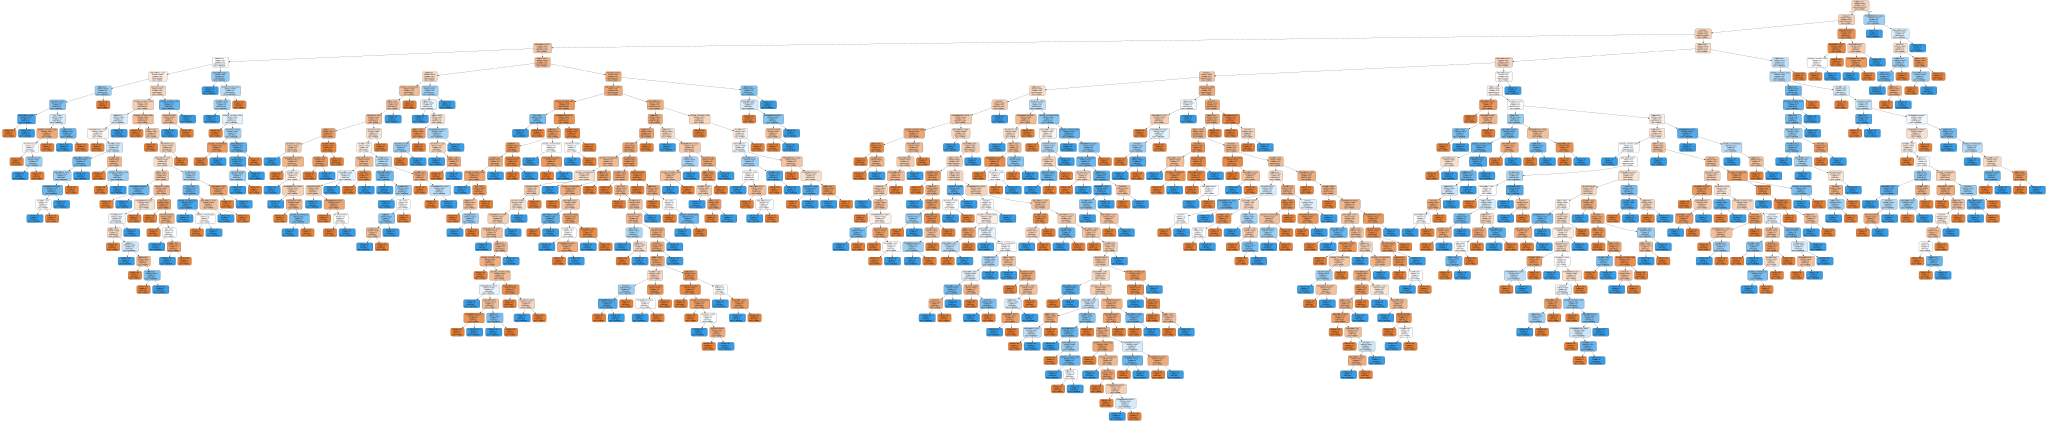

In [22]:
# # Graphviz used below for a better and clearer view : Change the path name accordingly

# os.environ["PATH"] += os.pathsep + 'C:/Users/Swarnika/anaconda3/envs/nlp2021/Library/bin/graphviz/'


# dot_data1 = export_graphviz(clf1_DT, out_file=None)
# graph1 = graphviz.Source(dot_data1)
# graph1.render("water_potability")

# # 0 is Not potable and 1 is Potable
# dot_data1 = export_graphviz(clf1_DT, out_file=None, feature_names=features, class_names=('Potable','Not potable'), filled=True, rounded=True, special_characters=True)
# graph1 = graphviz.Source(dot_data1)
# graph1

Accuracy Score on train data: 1.0
Confusion Matrix of train data: 
  [[1583    0]
 [   0 1029]]
classification report on train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1583
           1       1.00      1.00      1.00      1029

    accuracy                           1.00      2612
   macro avg       1.00      1.00      1.00      2612
weighted avg       1.00      1.00      1.00      2612



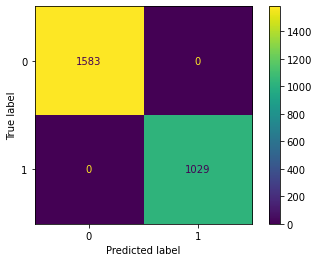

Accuracy Score on test data:   0.5941807044410413
Confusion Matrix of test data:
 [[267 143]
 [122 121]]
classification report on test data
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       410
           1       0.46      0.50      0.48       243

    accuracy                           0.59       653
   macro avg       0.57      0.57      0.57       653
weighted avg       0.60      0.59      0.60       653



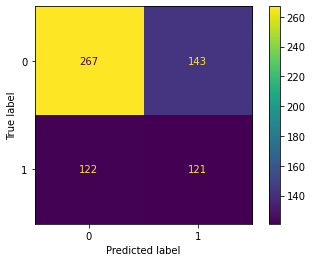

In [23]:
# Decision Tree Classifier - Case:1

# Evaluate the model on the train dataset
print('Accuracy Score on train data:', accuracy_score(y_true=y_train, y_pred=DTree.predict(x_train))) # Accuracy
print('Confusion Matrix of train data: \n ', confusion_matrix(y_true=y_train, y_pred=DTree.predict(x_train))) # ConfusionMatrix
print('classification report on train data')
print(classification_report(y_true=y_train, y_pred=DTree.predict(x_train))) # Classification Report
plot_confusion_matrix(DTree, x_train, y_train)  
plt.show()

# Evaluate the model on the test dataset
print('Accuracy Score on test data:  ', accuracy_score(y_true=y_test, y_pred=y_pred_DT))
print('Confusion Matrix of test data:\n', confusion_matrix(y_true=y_test, y_pred=y_pred_DT))
print('classification report on test data')
print(classification_report(y_true=y_test, y_pred=y_pred_DT))
plot_confusion_matrix(DTree, x_test, y_test)  
plt.show()

In [24]:
# Decision Tree Classifier - Case 2 : Tuning parameters to improve the accuracy
# Tune parameters of DT learning algorithm to improve the accuracy of model on the test dataset

threshold=0.5941807044410413
for i in range(1,10):
    for j in range(2,20):
        clf2_DT = DecisionTreeClassifier(criterion='entropy',max_features="sqrt", min_samples_split=j, max_depth=i,random_state=0)
        clf2_DT.fit(x_train, y_train)
        accuracy=accuracy_score(y_true=y_test, y_pred=clf2_DT.predict(x_test))
        if accuracy>threshold:
            threshold=accuracy
            print("min_samples_split :-",j)
            print("max_depth :- ",i)
            print('\tAccuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf2_DT.predict(x_train)))
            print('\tAccuracy Score on the test data: ',  accuracy_score(y_true=y_test, y_pred=clf2_DT.predict(x_test)))

min_samples_split :- 2
max_depth :-  1
	Accuracy Score on train data:  0.6125574272588055
	Accuracy Score on the test data:  0.6309341500765697
min_samples_split :- 2
max_depth :-  5
	Accuracy Score on train data:  0.6435681470137825
	Accuracy Score on the test data:  0.6416539050535988
min_samples_split :- 16
max_depth :-  7
	Accuracy Score on train data:  0.6715160796324655
	Accuracy Score on the test data:  0.6447166921898928


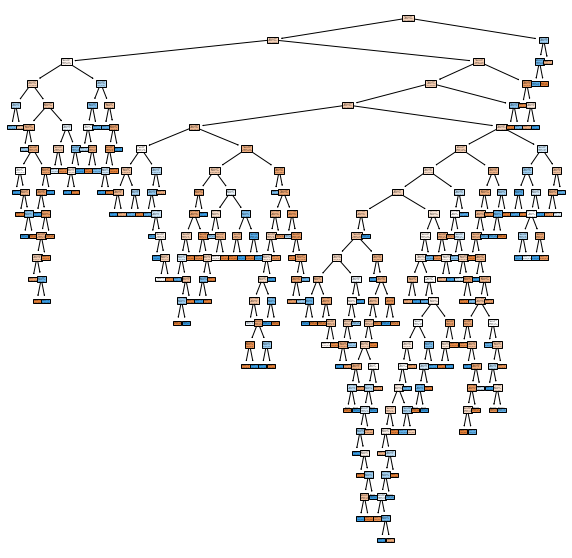

Accuracy Score on train data:  0.8395865237366003
Accuracy Score on the test data:  0.5803981623277182


In [25]:
# Decision Tree Classifier - Case 3 : Pruning decision trees with cost complexity pruning
# Checking Accuracy Values with differernt ccp_alpha values:

clf3_DT = DecisionTreeClassifier(random_state=0, ccp_alpha=0.001).fit(x_train, y_train)
plt.figure(figsize=(10,10))
plot_tree(clf3_DT, filled=True)
plt.show()

print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf3_DT.predict(x_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=clf3_DT.predict(x_test)))

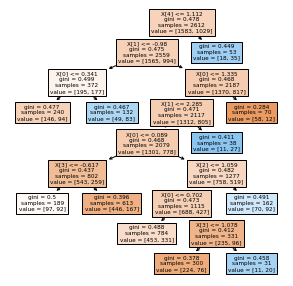

Accuracy Score on train data:  0.6435681470137825
Accuracy Score on the test data:  0.6125574272588055


In [26]:
# Decision Tree Classifier - Case 3 : Pruning decision trees with cost complexity pruning
# Checking Accuracy Values with differernt ccp_alpha values:

clf4_DT = DecisionTreeClassifier(random_state=0, ccp_alpha=0.003).fit(x_train, y_train)
plt.figure(figsize=(5,5))
plot_tree(clf4_DT, filled=True)
plt.show()

print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf4_DT.predict(x_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=clf4_DT.predict(x_test)))

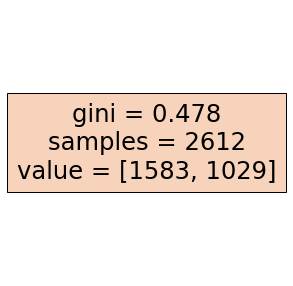

Accuracy Score on train data:  0.6060490045941807
Accuracy Score on the test data:  0.6278713629402757


In [27]:
# Decision Tree Classifier - Case 3 : Pruning decision trees with cost complexity pruning
# Checking Accuracy Values with differernt ccp_alpha values:
clf5_DT = DecisionTreeClassifier(random_state=0, ccp_alpha=0.005).fit(x_train, y_train)
plt.figure(figsize=(5,5))
plot_tree(clf5_DT, filled=True)
plt.show()
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf5_DT.predict(x_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=clf5_DT.predict(x_test)))

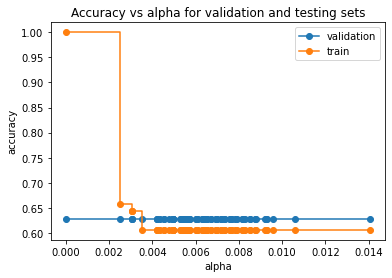

In [28]:
# Decision Tree Classifier - Case 3 : Pruning decision trees with cost complexity pruning
# Choosing a value for `alpha` in cost complexity pruning
path = clf1_DT.cost_complexity_pruning_path(x_test, y_test)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs_DT = []
for ccp_alpha in ccp_alphas:
    clf1_DT = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf1_DT.fit(x_train, y_train)
    clfs_DT.append(clf1_DT)
clfs_DT = clfs_DT[:-1]
ccp_alphas = ccp_alphas[:-1]
val_scores = [clf1_DT.score(x_test, y_test) for clf_DT in clfs_DT]
train_scores = [clf1_DT.score(x_train, y_train) for clf1_DT in clfs_DT]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for validation and testing sets")
ax.plot(ccp_alphas, val_scores, marker='o', label="validation",
        drawstyle="steps-post")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.legend()
plt.show()

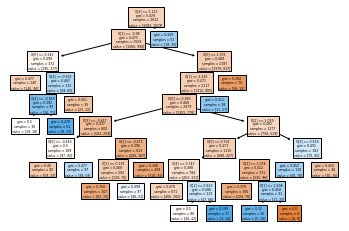

Accuracy Score on train data:  0.6060490045941807
Accuracy Score on the test data:  0.6278713629402757


In [29]:
# Decision Tree Classifier - Case 3 : Pruning decision trees with cost complexity pruning
# Initializing the tree with best alpha value

clf_new_DT = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0022).fit(x_train, y_train)
tree.plot_tree(clf_new_DT, filled=True)
plt.show()

# Accuracy on Traing and Testing data is calculated

print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf1_DT.predict(x_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=clf1_DT.predict(x_test)))

Accuracy Score on test data:   0.669218989280245
Confusion Matrix of test data:
 [[373  37]
 [179  64]]
classification report on test data
              precision    recall  f1-score   support

           0       0.68      0.91      0.78       410
           1       0.63      0.26      0.37       243

    accuracy                           0.67       653
   macro avg       0.65      0.59      0.57       653
weighted avg       0.66      0.67      0.63       653



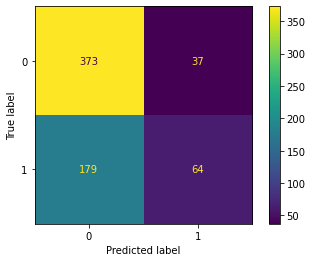

In [30]:
# Gradient Boosting Classifier
clf_XG = GradientBoostingClassifier(random_state=0) # Building a  model
clf_XG.fit(x_train, y_train) # Training a  model
y_pred_XG =  clf_XG.predict(x_test) # Make predictions

# Evaluate the model on the test dataset
print('Accuracy Score on test data:  ', accuracy_score(y_true=y_test, y_pred=y_pred_XG))
print('Confusion Matrix of test data:\n', confusion_matrix(y_true=y_test, y_pred=y_pred_XG))
print('classification report on test data')
print(classification_report(y_true=y_test, y_pred=y_pred_XG))

plot_confusion_matrix(clf_XG, x_test, y_test)  
plt.show()

Accuracy Score on test data:   0.669218989280245
Confusion Matrix of test data:
 [[359  51]
 [165  78]]
classification report on test data
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       410
           1       0.60      0.32      0.42       243

    accuracy                           0.67       653
   macro avg       0.64      0.60      0.59       653
weighted avg       0.66      0.67      0.64       653



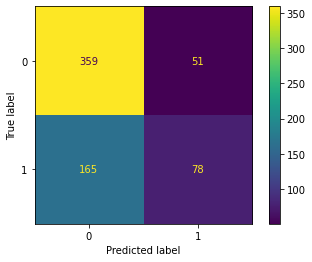

In [31]:
# Random Forest Classifier
clf_RF = RandomForestClassifier(random_state=0) # Building a  model
clf_RF.fit(x_train, y_train) # Training a  model
y_pred_RF =  clf_RF.predict(x_test) # Make predictions

# Evaluate the model on the test dataset
print('Accuracy Score on test data:  ', accuracy_score(y_true=y_test, y_pred=y_pred_RF))
print('Confusion Matrix of test data:\n', confusion_matrix(y_true=y_test, y_pred=y_pred_RF))
print('classification report on test data')
print(classification_report(y_true=y_test, y_pred=y_pred_RF))

plot_confusion_matrix(clf_RF, x_test, y_test)  
plt.show()

Baseline (random guess): ROC AUC=0.500
Decision Tree: ROC AUC=0.603
Gradient Boosting: ROC AUC=0.642
Random Forest: ROC AUC=0.642


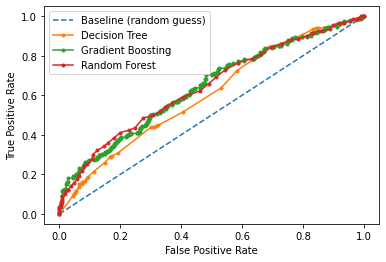

In [32]:
# ROC Curve for Decision Tree, Gradient Boosting and Random Forest

# generate a random prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities for different models
lr_probs1 = clf2_DT.predict_proba(x_test) # chosen the one that gives the best accuracy, i.e, Case 2
lr_probs2 = clf_XG.predict_proba(x_test)
lr_probs3 = clf_RF.predict_proba(x_test)

# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]
lr_probs2 = lr_probs2[:, 1]
lr_probs3 = lr_probs3[:, 1]

# calculate accuracy score for random prediction model
ns_auc = roc_auc_score(y_test, ns_probs)

# calculate accuracy score different MLP models
lr_auc1 = roc_auc_score(y_test, lr_probs1)
lr_auc2 = roc_auc_score(y_test, lr_probs2)
lr_auc3 = roc_auc_score(y_test, lr_probs3)

# summarize scores
print('Baseline (random guess): ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc1))
print('Gradient Boosting: ROC AUC=%.3f' % (lr_auc2))
print('Random Forest: ROC AUC=%.3f' % (lr_auc3))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test, lr_probs2)
lr_fpr3, lr_tpr3, _ = roc_curve(y_test, lr_probs3)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline (random guess)')
plt.plot(lr_fpr1, lr_tpr1, marker='.', label='Decision Tree')
plt.plot(lr_fpr2, lr_tpr2, marker='.', label='Gradient Boosting')
plt.plot(lr_fpr3, lr_tpr3, marker='.', label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

DecisionTreeClassifier: 0.613702 (0.013403)
GradientBoostingClassifier: 0.631304 (0.015626)
RandomForestClassifier: 0.655428 (0.015859)


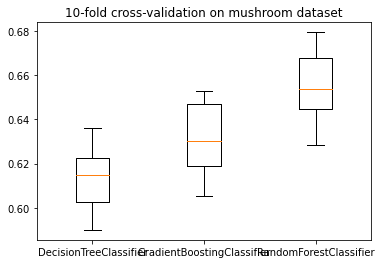

In [33]:
# Comparison of results for Decision Tree, Gradient Boosting and Random Forest Classifiers with 10 folds cross validation

# Spot Check Algorithms
models = []
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(ccp_alpha=0.003)))
models.append(('GradientBoostingClassifier',GradientBoostingClassifier()))
models.append(('RandomForestClassifier',RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('10-fold cross-validation on mushroom dataset')
plt.show()

## Neural Network

In [19]:
def print_report(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion matrix : \n',cm)

    # outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(y_test,y_pred,labels=[0,1]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy
    matrix = classification_report(y_test,y_pred,labels=[0,1])
    print('Classification report : \n',matrix)

    #plot confusion matrix
    # sns.heatmap(cm, annot=True)
    # plt.title("Confusion Matrix")
    # plt.show()

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

    #roc-auc
    print(roc_auc_score(y_test, y_pred))
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()    

### (a) Multi-Layer Perceptron

In [20]:
clf3 = MLPClassifier(random_state=0, activation='relu', hidden_layer_sizes=(20,), max_iter=1000)
clf3.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(20,), max_iter=1000, random_state=0)

In [21]:
lr_probs3 = clf3.predict(x_test)
# lr_probs3 = lr_probs3[:, 1]
lr_auc3 = roc_auc_score(y_test, lr_probs3)
print('MLP 3 (hidden layer sizes=20): ROC AUC=%.3f' % (lr_auc3))
lr_fpr3, lr_tpr3, _ = roc_curve(y_test, lr_probs3)

MLP 3 (hidden layer sizes=20): ROC AUC=0.584


Confusion matrix : 
 [[351  75]
 [149  78]]
Outcome values : 
 351 75 149 78
Classification report : 
               precision    recall  f1-score   support

           0       0.70      0.82      0.76       426
           1       0.51      0.34      0.41       227

    accuracy                           0.66       653
   macro avg       0.61      0.58      0.58       653
weighted avg       0.64      0.66      0.64       653



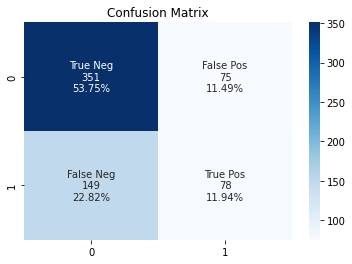

0.5837779983867966


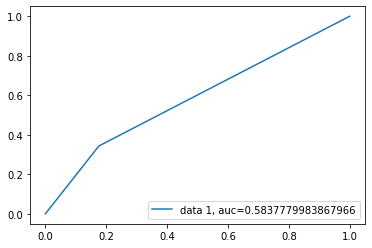

In [22]:
print_report(y_test, lr_probs3)

### (b)Perceptron

In [23]:
pptn = Perceptron(eta0=0.1, random_state=1, max_iter=400)
pptn.fit(x_train, y_train)
pptn_pred = pptn.predict(x_test)

Confusion matrix : 
 [[187 239]
 [ 93 134]]
Outcome values : 
 187 239 93 134
Classification report : 
               precision    recall  f1-score   support

           0       0.67      0.44      0.53       426
           1       0.36      0.59      0.45       227

    accuracy                           0.49       653
   macro avg       0.51      0.51      0.49       653
weighted avg       0.56      0.49      0.50       653



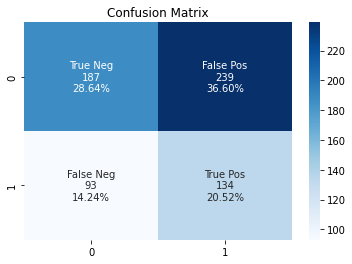

0.5146377530971439


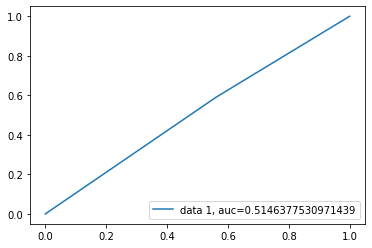

In [24]:
print_report(y_test, pptn_pred)

### (c) Densely Connected Neural Network

In [25]:
def build_classifier():
    classifier = Sequential()  # initialize neural network architecture
    classifier.add(Dense(units=8, kernel_initializer="uniform", activation="relu", input_dim=x_train.shape[1]))
    classifier.add(Dense(units=8, kernel_initializer="uniform", activation="relu"))  # kernel_initializer: to initialize weights
    classifier.add(Dense(units=1, kernel_initializer="uniform", activation="sigmoid"))  # output layer
    classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return classifier

In [26]:
classifier = KerasClassifier(build_fn=build_classifier)
folds = KFold(n_splits=10, random_state=1, shuffle=True).split(x_train, y_train)
histories = []
for train_ids, test_ids in folds:
#     classifier.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=128, verbose=1)
    
    x_train_fold = x_train.iloc[train_ids]
    y_train_fold = y_train.iloc[train_ids]
    x_test_fold = x_train.iloc[test_ids]
    y_test_fold = y_train.iloc[test_ids]
    history = classifier.fit(x_train_fold, y_train_fold, validation_data=(x_test_fold, y_test_fold), epochs=100, batch_size=128, verbose=1)
    histories.append(history)


C:\Users\Preethi\AppData\Local\Temp/ipykernel_11792/3915164996.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  classifier = KerasClassifier(build_fn=build_classifier)


Epoch 1/100
19/19 [==============================] - 2s 13ms/step - loss: 0.6923 - accuracy: 0.5902 - val_loss: 0.6906 - val_accuracy: 0.6221
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6903 - accuracy: 0.5974 - val_loss: 0.6878 - val_accuracy: 0.6221
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6878 - accuracy: 0.5974 - val_loss: 0.6840 - val_accuracy: 0.6221
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6849 - accuracy: 0.5974 - val_loss: 0.6793 - val_accuracy: 0.6221
Epoch 5/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6811 - accuracy: 0.5974 - val_loss: 0.6742 - val_accuracy: 0.6221
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6776 - accuracy: 0.5974 - val_loss: 0.6683 - val_accuracy: 0.6221
Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6748 - accuracy: 0.5974 - val_loss: 0.6644 - val_accuracy: 0.6221
Epoch 8/100


Epoch 59/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6557 - accuracy: 0.6226 - val_loss: 0.6622 - val_accuracy: 0.6145
Epoch 60/100
19/19 [==============================] - 0s 6ms/step - loss: 0.6553 - accuracy: 0.6209 - val_loss: 0.6617 - val_accuracy: 0.6107
Epoch 61/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6553 - accuracy: 0.6196 - val_loss: 0.6626 - val_accuracy: 0.6107
Epoch 62/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6552 - accuracy: 0.6183 - val_loss: 0.6620 - val_accuracy: 0.6069
Epoch 63/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6549 - accuracy: 0.6213 - val_loss: 0.6625 - val_accuracy: 0.6031
Epoch 64/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6547 - accuracy: 0.6247 - val_loss: 0.6629 - val_accuracy: 0.6069
Epoch 65/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6547 - accuracy: 0.6260 - val_loss: 0.6629 - val_accuracy: 0.6145
Epoch 

Epoch 17/100
19/19 [==============================] - 0s 7ms/step - loss: 0.6692 - accuracy: 0.5991 - val_loss: 0.6705 - val_accuracy: 0.6069
Epoch 18/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6689 - accuracy: 0.5991 - val_loss: 0.6705 - val_accuracy: 0.6069
Epoch 19/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6686 - accuracy: 0.5991 - val_loss: 0.6702 - val_accuracy: 0.6069
Epoch 20/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6684 - accuracy: 0.5991 - val_loss: 0.6699 - val_accuracy: 0.6069
Epoch 21/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6680 - accuracy: 0.5991 - val_loss: 0.6697 - val_accuracy: 0.6069
Epoch 22/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6677 - accuracy: 0.5991 - val_loss: 0.6697 - val_accuracy: 0.6069
Epoch 23/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6674 - accuracy: 0.5991 - val_loss: 0.6697 - val_accuracy: 0.6069
Epoch 

Epoch 75/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6533 - accuracy: 0.6187 - val_loss: 0.6643 - val_accuracy: 0.5840
Epoch 76/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6533 - accuracy: 0.6153 - val_loss: 0.6639 - val_accuracy: 0.5878
Epoch 77/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6531 - accuracy: 0.6170 - val_loss: 0.6640 - val_accuracy: 0.5954
Epoch 78/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6531 - accuracy: 0.6145 - val_loss: 0.6643 - val_accuracy: 0.5954
Epoch 79/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6530 - accuracy: 0.6157 - val_loss: 0.6640 - val_accuracy: 0.5840
Epoch 80/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6526 - accuracy: 0.6166 - val_loss: 0.6640 - val_accuracy: 0.5878
Epoch 81/100
19/19 [==============================] - 0s 7ms/step - loss: 0.6526 - accuracy: 0.6166 - val_loss: 0.6643 - val_accuracy: 0.5992
Epoch 

Epoch 33/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6640 - accuracy: 0.6036 - val_loss: 0.6850 - val_accuracy: 0.5670
Epoch 34/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6636 - accuracy: 0.6036 - val_loss: 0.6838 - val_accuracy: 0.5670
Epoch 35/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6633 - accuracy: 0.6036 - val_loss: 0.6832 - val_accuracy: 0.5670
Epoch 36/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6630 - accuracy: 0.6036 - val_loss: 0.6832 - val_accuracy: 0.5670
Epoch 37/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6629 - accuracy: 0.6036 - val_loss: 0.6827 - val_accuracy: 0.5670
Epoch 38/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6625 - accuracy: 0.6036 - val_loss: 0.6830 - val_accuracy: 0.5670
Epoch 39/100
19/19 [==============================] - 0s 6ms/step - loss: 0.6625 - accuracy: 0.6036 - val_loss: 0.6827 - val_accuracy: 0.5670
Epoch 

Epoch 91/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6566 - accuracy: 0.6168 - val_loss: 0.6695 - val_accuracy: 0.5785
Epoch 92/100
19/19 [==============================] - 0s 6ms/step - loss: 0.6566 - accuracy: 0.6163 - val_loss: 0.6698 - val_accuracy: 0.5824
Epoch 93/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6566 - accuracy: 0.6159 - val_loss: 0.6703 - val_accuracy: 0.5785
Epoch 94/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6564 - accuracy: 0.6163 - val_loss: 0.6698 - val_accuracy: 0.5785
Epoch 95/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6565 - accuracy: 0.6176 - val_loss: 0.6700 - val_accuracy: 0.5785
Epoch 96/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6566 - accuracy: 0.6168 - val_loss: 0.6703 - val_accuracy: 0.5785
Epoch 97/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6566 - accuracy: 0.6151 - val_loss: 0.6701 - val_accuracy: 0.5785
Epoch 

Epoch 49/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6479 - accuracy: 0.6176 - val_loss: 0.6964 - val_accuracy: 0.5556
Epoch 50/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6474 - accuracy: 0.6172 - val_loss: 0.6962 - val_accuracy: 0.5517
Epoch 51/100
19/19 [==============================] - 0s 6ms/step - loss: 0.6467 - accuracy: 0.6172 - val_loss: 0.6973 - val_accuracy: 0.5517
Epoch 52/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6464 - accuracy: 0.6185 - val_loss: 0.6961 - val_accuracy: 0.5441
Epoch 53/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6458 - accuracy: 0.6189 - val_loss: 0.6954 - val_accuracy: 0.5517
Epoch 54/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6453 - accuracy: 0.6193 - val_loss: 0.6951 - val_accuracy: 0.5517
Epoch 55/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6446 - accuracy: 0.6206 - val_loss: 0.6956 - val_accuracy: 0.5479
Epoch 

Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6732 - accuracy: 0.6010 - val_loss: 0.6757 - val_accuracy: 0.5900
Epoch 8/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6716 - accuracy: 0.6010 - val_loss: 0.6755 - val_accuracy: 0.5900
Epoch 9/100
19/19 [==============================] - 0s 7ms/step - loss: 0.6707 - accuracy: 0.6010 - val_loss: 0.6755 - val_accuracy: 0.5900
Epoch 10/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6705 - accuracy: 0.6010 - val_loss: 0.6756 - val_accuracy: 0.5900
Epoch 11/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6703 - accuracy: 0.6010 - val_loss: 0.6754 - val_accuracy: 0.5900
Epoch 12/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6702 - accuracy: 0.6010 - val_loss: 0.6755 - val_accuracy: 0.5900
Epoch 13/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6701 - accuracy: 0.6010 - val_loss: 0.6752 - val_accuracy: 0.5900
Epoch 14/

Epoch 65/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6581 - accuracy: 0.6142 - val_loss: 0.6622 - val_accuracy: 0.5939
Epoch 66/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6577 - accuracy: 0.6138 - val_loss: 0.6618 - val_accuracy: 0.5939
Epoch 67/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6577 - accuracy: 0.6168 - val_loss: 0.6617 - val_accuracy: 0.5824
Epoch 68/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6574 - accuracy: 0.6163 - val_loss: 0.6622 - val_accuracy: 0.5939
Epoch 69/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6573 - accuracy: 0.6155 - val_loss: 0.6620 - val_accuracy: 0.5900
Epoch 70/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6570 - accuracy: 0.6180 - val_loss: 0.6615 - val_accuracy: 0.5900
Epoch 71/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6570 - accuracy: 0.6206 - val_loss: 0.6606 - val_accuracy: 0.5785
Epoch 

Epoch 23/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6698 - accuracy: 0.5968 - val_loss: 0.6605 - val_accuracy: 0.6284
Epoch 24/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6696 - accuracy: 0.5968 - val_loss: 0.6608 - val_accuracy: 0.6284
Epoch 25/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6695 - accuracy: 0.5968 - val_loss: 0.6611 - val_accuracy: 0.6284
Epoch 26/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6692 - accuracy: 0.5968 - val_loss: 0.6610 - val_accuracy: 0.6284
Epoch 27/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6690 - accuracy: 0.5968 - val_loss: 0.6610 - val_accuracy: 0.6284
Epoch 28/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6689 - accuracy: 0.5968 - val_loss: 0.6610 - val_accuracy: 0.6284
Epoch 29/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6688 - accuracy: 0.5968 - val_loss: 0.6606 - val_accuracy: 0.6284
Epoch 

Epoch 81/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6568 - accuracy: 0.6100 - val_loss: 0.6555 - val_accuracy: 0.6513
Epoch 82/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6565 - accuracy: 0.6091 - val_loss: 0.6567 - val_accuracy: 0.6475
Epoch 83/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6564 - accuracy: 0.6104 - val_loss: 0.6554 - val_accuracy: 0.6513
Epoch 84/100
19/19 [==============================] - 0s 7ms/step - loss: 0.6562 - accuracy: 0.6083 - val_loss: 0.6564 - val_accuracy: 0.6513
Epoch 85/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6560 - accuracy: 0.6095 - val_loss: 0.6585 - val_accuracy: 0.6398
Epoch 86/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6557 - accuracy: 0.6100 - val_loss: 0.6577 - val_accuracy: 0.6513
Epoch 87/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6555 - accuracy: 0.6091 - val_loss: 0.6557 - val_accuracy: 0.6513
Epoch 

Epoch 39/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6629 - accuracy: 0.6031 - val_loss: 0.6879 - val_accuracy: 0.5709
Epoch 40/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6625 - accuracy: 0.6048 - val_loss: 0.6874 - val_accuracy: 0.5709
Epoch 41/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6624 - accuracy: 0.6057 - val_loss: 0.6869 - val_accuracy: 0.5709
Epoch 42/100
19/19 [==============================] - 0s 6ms/step - loss: 0.6620 - accuracy: 0.6057 - val_loss: 0.6864 - val_accuracy: 0.5709
Epoch 43/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6616 - accuracy: 0.6061 - val_loss: 0.6871 - val_accuracy: 0.5709
Epoch 44/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6612 - accuracy: 0.6070 - val_loss: 0.6861 - val_accuracy: 0.5747
Epoch 45/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6610 - accuracy: 0.6057 - val_loss: 0.6873 - val_accuracy: 0.5747
Epoch 

Epoch 97/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6459 - accuracy: 0.6282 - val_loss: 0.6782 - val_accuracy: 0.5632
Epoch 98/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6452 - accuracy: 0.6321 - val_loss: 0.6777 - val_accuracy: 0.5594
Epoch 99/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6449 - accuracy: 0.6329 - val_loss: 0.6778 - val_accuracy: 0.5594
Epoch 100/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6446 - accuracy: 0.6316 - val_loss: 0.6775 - val_accuracy: 0.5632
Epoch 1/100
19/19 [==============================] - 1s 14ms/step - loss: 0.6923 - accuracy: 0.5874 - val_loss: 0.6911 - val_accuracy: 0.5977
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6900 - accuracy: 0.6002 - val_loss: 0.6886 - val_accuracy: 0.5977
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6872 - accuracy: 0.6002 - val_loss: 0.6854 - val_accuracy: 0.5977
Epoch 4

Epoch 55/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6646 - accuracy: 0.6002 - val_loss: 0.6672 - val_accuracy: 0.5977
Epoch 56/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6645 - accuracy: 0.6002 - val_loss: 0.6669 - val_accuracy: 0.5977
Epoch 57/100
19/19 [==============================] - 0s 6ms/step - loss: 0.6643 - accuracy: 0.6002 - val_loss: 0.6666 - val_accuracy: 0.5977
Epoch 58/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6642 - accuracy: 0.6002 - val_loss: 0.6666 - val_accuracy: 0.5977
Epoch 59/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6643 - accuracy: 0.6002 - val_loss: 0.6667 - val_accuracy: 0.5977
Epoch 60/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6639 - accuracy: 0.6002 - val_loss: 0.6658 - val_accuracy: 0.5977
Epoch 61/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6637 - accuracy: 0.6002 - val_loss: 0.6653 - val_accuracy: 0.5977
Epoch 

Epoch 13/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6721 - accuracy: 0.5951 - val_loss: 0.6544 - val_accuracy: 0.6437
Epoch 14/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6720 - accuracy: 0.5951 - val_loss: 0.6542 - val_accuracy: 0.6437
Epoch 15/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6718 - accuracy: 0.5951 - val_loss: 0.6546 - val_accuracy: 0.6437
Epoch 16/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6715 - accuracy: 0.5951 - val_loss: 0.6538 - val_accuracy: 0.6437
Epoch 17/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6713 - accuracy: 0.5951 - val_loss: 0.6542 - val_accuracy: 0.6437
Epoch 18/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6711 - accuracy: 0.5951 - val_loss: 0.6537 - val_accuracy: 0.6437
Epoch 19/100
19/19 [==============================] - 0s 7ms/step - loss: 0.6709 - accuracy: 0.5951 - val_loss: 0.6538 - val_accuracy: 0.6437
Epoch 

Epoch 71/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6554 - accuracy: 0.6117 - val_loss: 0.6492 - val_accuracy: 0.6552
Epoch 72/100
19/19 [==============================] - 0s 7ms/step - loss: 0.6553 - accuracy: 0.6134 - val_loss: 0.6487 - val_accuracy: 0.6475
Epoch 73/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6556 - accuracy: 0.6163 - val_loss: 0.6477 - val_accuracy: 0.6513
Epoch 74/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6553 - accuracy: 0.6095 - val_loss: 0.6496 - val_accuracy: 0.6475
Epoch 75/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6549 - accuracy: 0.6159 - val_loss: 0.6487 - val_accuracy: 0.6437
Epoch 76/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6547 - accuracy: 0.6117 - val_loss: 0.6493 - val_accuracy: 0.6513
Epoch 77/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6545 - accuracy: 0.6125 - val_loss: 0.6485 - val_accuracy: 0.6552
Epoch 

Epoch 29/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6671 - accuracy: 0.5989 - val_loss: 0.6739 - val_accuracy: 0.6092
Epoch 30/100
19/19 [==============================] - 0s 7ms/step - loss: 0.6664 - accuracy: 0.5989 - val_loss: 0.6730 - val_accuracy: 0.6092
Epoch 31/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6661 - accuracy: 0.5989 - val_loss: 0.6730 - val_accuracy: 0.6092
Epoch 32/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6657 - accuracy: 0.5989 - val_loss: 0.6728 - val_accuracy: 0.6092
Epoch 33/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6652 - accuracy: 0.5989 - val_loss: 0.6725 - val_accuracy: 0.6092
Epoch 34/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6647 - accuracy: 0.5989 - val_loss: 0.6722 - val_accuracy: 0.6092
Epoch 35/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6643 - accuracy: 0.5989 - val_loss: 0.6722 - val_accuracy: 0.6092
Epoch 

Epoch 87/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6435 - accuracy: 0.6257 - val_loss: 0.6594 - val_accuracy: 0.6169
Epoch 88/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6425 - accuracy: 0.6291 - val_loss: 0.6606 - val_accuracy: 0.6130
Epoch 89/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6422 - accuracy: 0.6291 - val_loss: 0.6604 - val_accuracy: 0.6130
Epoch 90/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6421 - accuracy: 0.6355 - val_loss: 0.6605 - val_accuracy: 0.6207
Epoch 91/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6415 - accuracy: 0.6342 - val_loss: 0.6603 - val_accuracy: 0.6169
Epoch 92/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6412 - accuracy: 0.6333 - val_loss: 0.6600 - val_accuracy: 0.6169
Epoch 93/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6408 - accuracy: 0.6329 - val_loss: 0.6591 - val_accuracy: 0.6169
Epoch 

In [27]:
y_pred = classifier.predict(x_test)

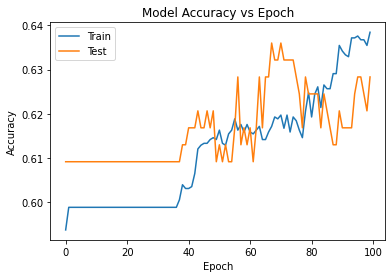

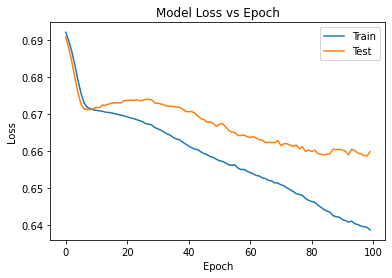

In [28]:
# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


Confusion matrix : 
 [[348  78]
 [156  71]]
Outcome values : 
 348 78 156 71
Classification report : 
               precision    recall  f1-score   support

           0       0.69      0.82      0.75       426
           1       0.48      0.31      0.38       227

    accuracy                           0.64       653
   macro avg       0.58      0.56      0.56       653
weighted avg       0.62      0.64      0.62       653



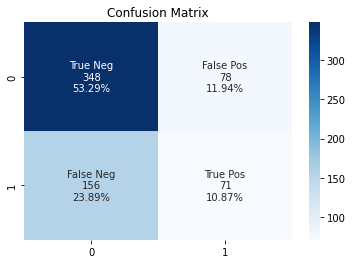

0.56483836942359


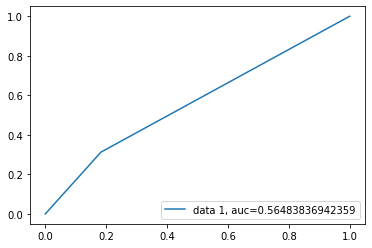

In [29]:
# confusion matrix
print_report(y_test, y_pred)

<h2> PCA and K-means algorithm</h2>
<p>

A table comparing the the performance of K-means clustering algorithm with and without the dimension reductions using PCA (with r=8, r=4 and r=2) according to different performance evaluation metrics (homogeneity score, completeness score, V measure, adjusted rand index, adjusted mutual information, and silhouette coefficient) is displayed.</p>

n_types: 2, 	 n_samples 3265, 	 n_features 9

-------------- Metrics before PCA -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	9	0.14s	26311	0.000	0.000	0.000	-0.003	-0.000	0.136
__________________________________________________________________________________

-------------- Metrics after PCA with r=10 -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	8	0.13s	23678	0.000	0.000	0.000	0.001	-0.000	0.137
__________________________________________________________________________________

-------------- Metrics after PCA with r=4 -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	4	0.13s	11632	0.000	0.000	0.000	0.001	0.00

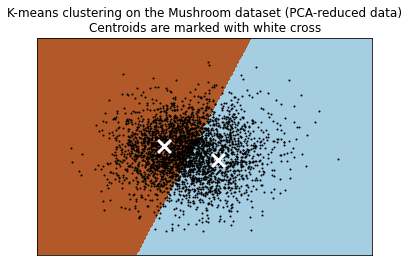

In [24]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score,silhouette_samples
from time import time
from sklearn.preprocessing import LabelEncoder, StandardScaler

np.random.seed(501)

X_values = x
y_values = y
data = scale(X_values)

n_samples, n_features = data.shape
n_types = len(np.unique(y_values))
labels = y_values

sample_size = 300

print("n_types: %d, \t n_samples %d, \t n_features %d"
      % (n_types, n_samples, n_features))

print('\n-------------- Metrics before PCA -------------------')
print(82 * '_')
print('init\t\tfeat\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    
        
    print('%-9s\t%i\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, data.shape[1],(time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))
    
bench_k_means(KMeans(init='k-means++', n_clusters=n_types, n_init=10),
              name="k-means++", data=data)

#bench_k_means(KMeans(init='random init.', n_clusters=n_types, n_init=10),
#              name="random init.", data=data)

#
print(82 * '_')

print('\n-------------- Metrics after PCA with r=10 -------------------')
print(82 * '_')
print('init\t\tfeat\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

    
reduced_data0 = PCA(n_components=8).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_types, n_init=10)
kmeans.fit(reduced_data0)


bench_k_means(KMeans(init='k-means++', n_clusters=n_types, n_init=10),
              name="k-means++", data=reduced_data0)

print(82 * '_')

print('\n-------------- Metrics after PCA with r=4 -------------------')
print(82 * '_')
print('init\t\tfeat\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

    
reduced_data0 = PCA(n_components=4).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_types, n_init=10)
kmeans.fit(reduced_data0)


bench_k_means(KMeans(init='k-means++', n_clusters=n_types, n_init=10),
              name="k-means++", data=reduced_data0)

print(82 * '_')

print('\n-------------- Metrics after PCA with r=2 -------------------')
print(82 * '_')
print('init\t\tfeat\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

    
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_types, n_init=10)
kmeans.fit(reduced_data)


bench_k_means(KMeans(init='k-means++', n_clusters=n_types, n_init=10),
              name="k-means++", data=reduced_data)

#bench_k_means(KMeans(init='random init.', n_clusters=n_types, n_init=10),
#              name="random init", data=reduced_data)


# #############################################################################
# Visualize the results on PCA-reduced data

#reduced_data = PCA(n_components=2).fit_transform(data)
#kmeans = KMeans(init='k-means++', n_clusters=n_types, n_init=10)
#kmeans.fit(reduced_data)


# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].
kmeans = KMeans(init='k-means++', n_clusters=n_types, n_init=10)
kmeans.fit(reduced_data)
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the Mushroom dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**K value Validation**

Different values of K ranging from 1 to 9 are used to calculate inertia (or total within-cluster sum of squares) and Average Silhouette score for each value of K.

Text(0, 0.5, 'Total within-cluster sum of squares')

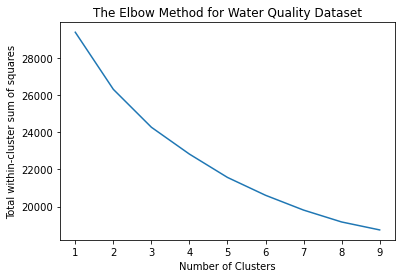

In [26]:
#To find appropriate k value
twss=[]
sa=[]

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init= 'k-means++')
    kmeans.fit(x)
    Ypreds=kmeans.predict(x)
    twss.append(kmeans.inertia_)
    if i>1:
        sa.append(silhouette_score(x, Ypreds))
plt.plot(range(1,10),twss)
plt.title('The Elbow Method for Water Quality Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('Total within-cluster sum of squares')

Text(0, 0.5, 'Average silhouette score')

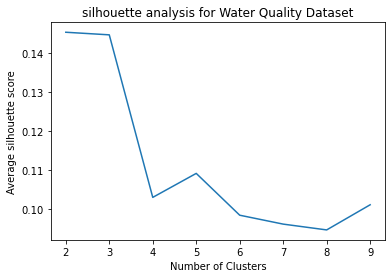

In [28]:
plt.plot(range(2,10),sa)
plt.title('silhouette analysis for Water Quality Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('Average silhouette score')

For n_clusters = 2 The average silhouette_score is : 0.1453214652133262


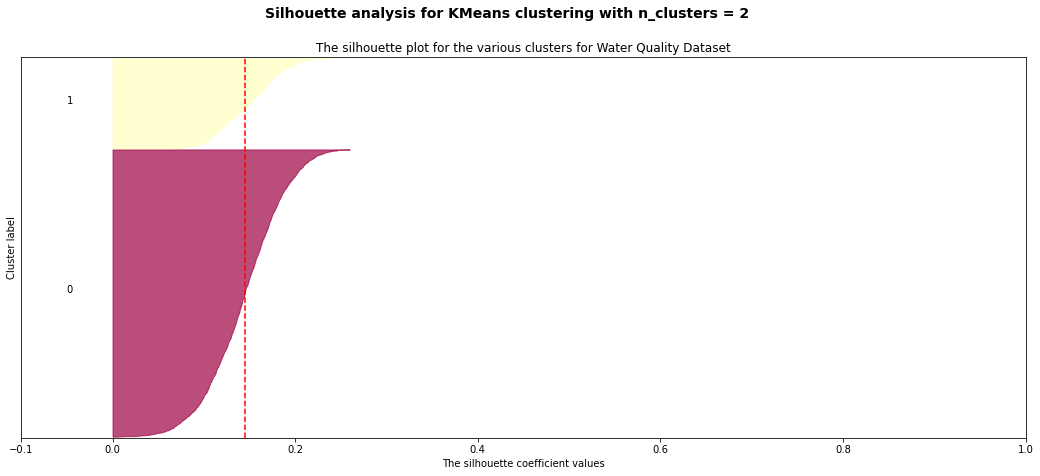

For n_clusters = 3 The average silhouette_score is : 0.11949281511947231


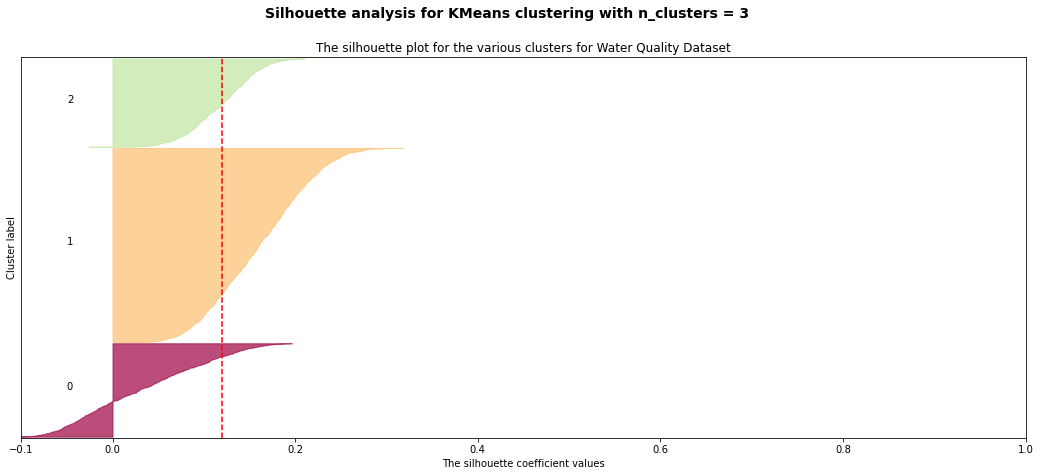

For n_clusters = 4 The average silhouette_score is : 0.1027569041240922


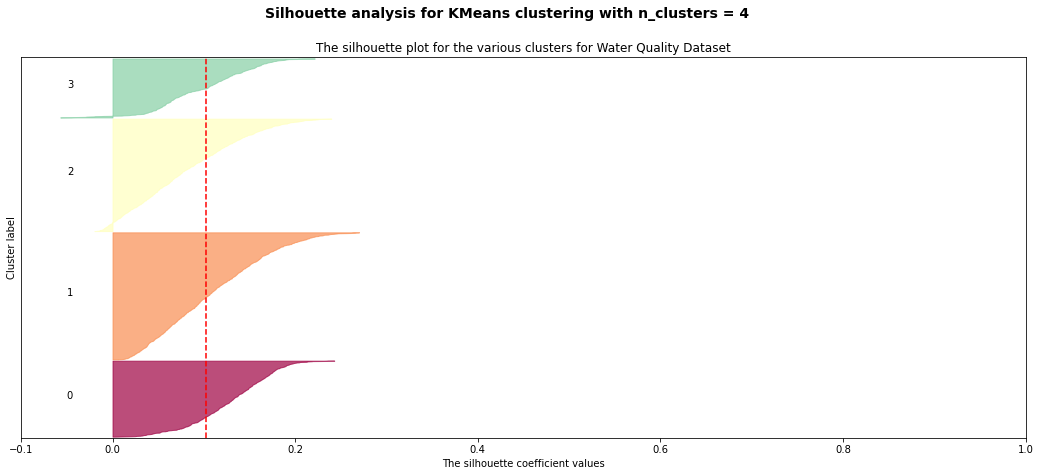

For n_clusters = 5 The average silhouette_score is : 0.10944177983431141


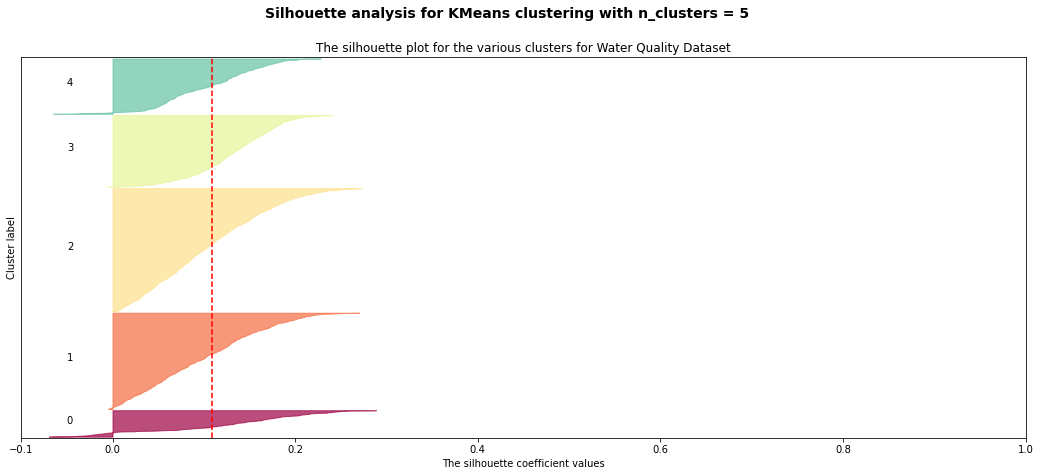

For n_clusters = 6 The average silhouette_score is : 0.09943605436256826


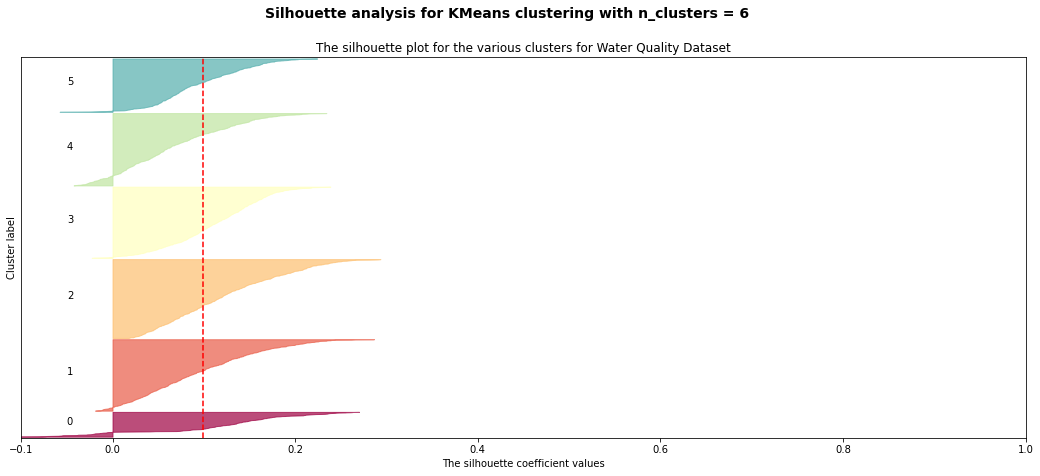

In [30]:
for n_clusters in range(2,7):
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18,7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(x, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()
    
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax1.set_title("The silhouette plot for the various clusters for Water Quality Dataset")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.suptitle(("Silhouette analysis for KMeans clustering "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()